In [155]:
%run ./1_DATA_INGESTION.ipynb

# Exploratory Data Analysis

In [156]:
df.sample(7) # random sample size 7

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
285697,286560,30,13,2010-02-05,12059.20,False,39.05,2.572,0.00,0.00,...,8.324,C,42988,False,False,False,False,5,2,2010
382131,383342,41,98,2010-09-24,9049.48,False,60.11,2.793,0.00,0.00,...,7.335,A,196321,False,False,False,False,38,9,2010
107337,107590,11,47,2012-09-28,85.00,False,77.67,3.666,7694.84,51.91,...,6.334,A,207499,False,False,False,False,39,9,2012
348234,349367,37,4,2011-03-25,17572.94,False,71.07,3.473,0.00,0.00,...,8.395,C,39910,False,False,False,False,12,3,2011
97480,97704,10,10,2012-10-19,46947.21,False,72.71,4.449,3067.64,0.00,...,6.943,B,126512,False,False,False,False,42,10,2012
231678,232414,24,52,2011-07-29,1018.15,False,74.84,4.004,0.00,0.00,...,8.358,A,203819,False,False,False,False,30,7,2011
284973,285829,29,3,2012-08-17,13881.91,False,74.92,3.840,1727.05,167.24,...,9.419,B,93638,False,False,False,False,33,8,2012


In [157]:
df.columns # show dataset column names

Index(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
       'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas', 'week', 'month',
       'year'],
      dtype='object')

In [158]:
df.info() # show column names, table schema and null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    420212 non-null  int64         
 1   Store         420212 non-null  int64         
 2   Dept          420212 non-null  int64         
 3   Date          420212 non-null  datetime64[ns]
 4   Weekly_Sales  420212 non-null  float64       
 5   IsHoliday     420212 non-null  bool          
 6   Temperature   420212 non-null  float64       
 7   Fuel_Price    420212 non-null  float64       
 8   MarkDown1     420212 non-null  float64       
 9   MarkDown2     420212 non-null  float64       
 10  MarkDown3     420212 non-null  float64       
 11  MarkDown4     420212 non-null  float64       
 12  MarkDown5     420212 non-null  float64       
 13  CPI           420212 non-null  float64       
 14  Unemployment  420212 non-null  float64       
 15  Type          420

In [159]:
print('rows =', df.shape[0], ', columns =' ,df.shape[1]) # show dataset dimesion

rows = 420212 , columns = 24


'Unnamed: 0' is an index column that can be discarded

In [160]:
df = df.drop('Unnamed: 0', axis=1)

Convert temperature from Farenheit to Celsius

In [161]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [162]:
df["Temperature"] = fahr_to_celsius(df["Temperature"])

Separate the dataset into numerical and categorical variables

In [163]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

Numerical variables histograms:

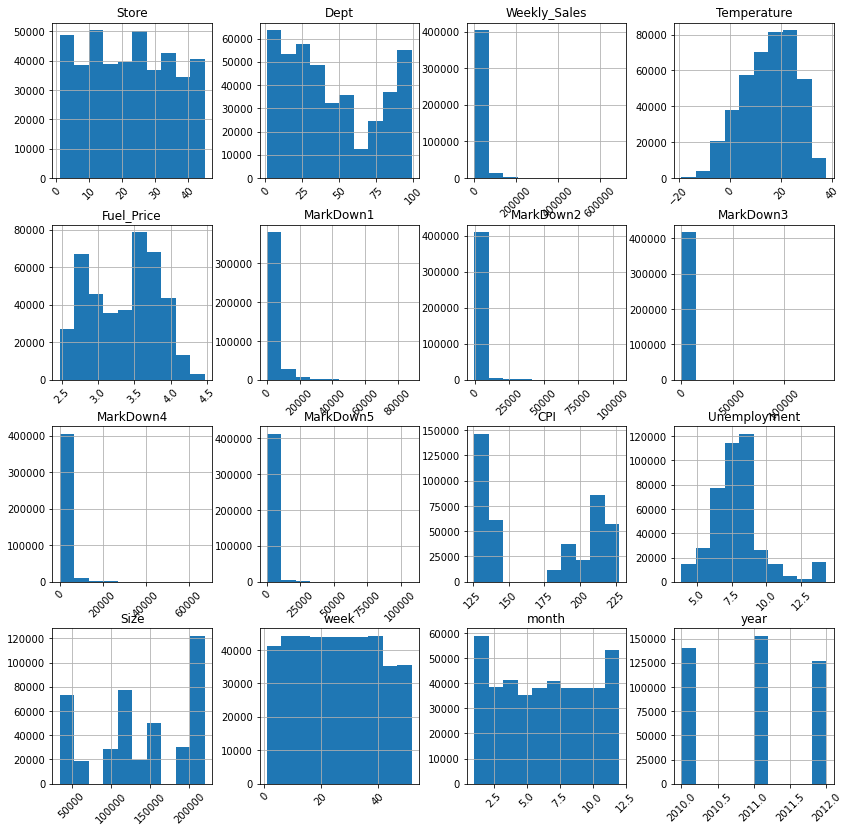

In [164]:
numeric_data.hist(figsize=(14,14), xrot=45)
plt.show()

Numerical variables statistical summary

Temperature ranges from -18°C to 37°C 

In [165]:
numeric_data.describe() # summary stats for numerical variables   ---Artur: Interpretación - Analizar cada dato 0.010000 - explicar

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,15.605888,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,25.828408,6.449866,2010.968454
std,12.787236,30.508819,22729.492116,10.248810,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,14.152489,3.243397,0.796898
min,1.000000,1.000000,0.010000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2120.130000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7661.700000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20271.265000,23.488889,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


Let us filter year 2010 and aggregate the sum independent variable 'Weekly_Sales' and group by the dependent variables

Is there a relation between Temperature and Sales variables?

In [166]:
tmp = df.query('year==2010').groupby('Temperature').agg(Weekly_Sales = ('Weekly_Sales', 'sum') ).reset_index()
fig = px.scatter(tmp, x='Temperature', y="Weekly_Sales", size='Weekly_Sales', trendline="ols")# for variable in dependent_variables]
fig.show()

Is there a relation between Fuel_Price and Sales variables?

In [167]:
tmp = df.query('year==2010').groupby('Fuel_Price').agg(Weekly_Sales = ('Weekly_Sales', 'sum') ).reset_index()
fig = px.scatter(tmp, x='Fuel_Price', y="Weekly_Sales", size='Weekly_Sales', trendline="ols")# for variable in dependent_variables]
fig.show()

Is there a relation between CPI and Sales variables?

In [168]:
tmp = df.query('year==2010').groupby('CPI').agg(Weekly_Sales = ('Weekly_Sales', 'sum') ).reset_index()
fig = px.scatter(tmp, x='CPI', y="Weekly_Sales", size='Weekly_Sales', trendline="ols")# for variable in dependent_variables]
fig.show()

Is there a relation between Unemployment and Sales variables?

In [169]:
tmp = df.query('year==2010').groupby('Unemployment').agg(Weekly_Sales = ('Weekly_Sales', 'sum') ).reset_index()
fig = px.scatter(tmp, x='Unemployment', y="Weekly_Sales", size='Weekly_Sales', trendline="ols")# for variable in dependent_variables]
fig.show()

Is there a relation between Size and Sales variables?

In [170]:
tmp = df.query('year==2010').groupby('Size').agg(Weekly_Sales = ('Weekly_Sales', 'sum') ).reset_index()
fig = px.scatter(tmp, x='Size', y="Weekly_Sales", size='Weekly_Sales', trendline="ols")# for variable in dependent_variables]
fig.show()

Build a Correlation Matrix Graph

In [171]:
# discard noise columns
tmp = numeric_data.drop(['year', 'month', 'week', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

# draw visuzlization
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = tmp.corr().columns,
        y = tmp.corr().index,
        z = np.array(df.corr()),
        text=df.corr().values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

Take a look to the categorical variables statistics:

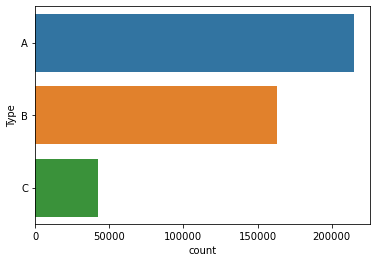

In [172]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

In [173]:
#Group numeric features by each categorical feature.
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Type,,,,,,,,,,,,,,,,,,,,,
A,21.732254,44.629328,20148.108162,0.070524,15.850399,3.343986,3102.948292,1081.680100,550.360522,1326.404182,...,174.385610,7.791458,182225.385098,0.021176,0.021115,0.014156,0.014077,25.827587,6.449886,2010.966664
B,18.440281,43.050864,12290.549297,0.070313,14.201404,3.382280,2552.850604,826.520020,482.164755,1044.008008,...,167.217590,7.928047,101796.844232,0.021132,0.020911,0.014203,0.014067,25.830963,6.450251,2010.967590
C,38.937382,46.840689,9549.454168,0.069565,19.752258,3.364466,138.971526,53.239898,5.145340,5.605690,...,170.464163,8.935687,40536.097070,0.020747,0.020935,0.013918,0.013965,25.822768,6.448286,2010.980831


Null Value Analysis

In [174]:
round(df.isnull().sum().sort_values(ascending=False)*100/len(df), 4) # Descending Percentage of Null Values by Column

Store           0.0
CPI             0.0
month           0.0
week            0.0
Christmas       0.0
Thanksgiving    0.0
Labor_Day       0.0
Super_Bowl      0.0
Size            0.0
Type            0.0
Unemployment    0.0
MarkDown5       0.0
Dept            0.0
MarkDown4       0.0
MarkDown3       0.0
MarkDown2       0.0
MarkDown1       0.0
Fuel_Price      0.0
Temperature     0.0
IsHoliday       0.0
Weekly_Sales    0.0
Date            0.0
year            0.0
dtype: float64